In [1]:
import pandas as pd
import numpy as np 

df=pd.read_csv('../data/Titanic_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle,AgeGroup_Senior,FareBand
0,0,3,0,22.0,1,0,7.2500,2,0,1,0,0,0,1,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,2,0,0,1,0,0,0,0,1,0,0,4
2,1,3,1,26.0,0,0,7.9250,1,1,0,0,0,0,1,0,1,0,0,2
3,1,1,1,35.0,1,0,53.1000,2,0,0,1,0,0,1,0,1,0,0,4
4,0,3,0,35.0,0,0,8.0500,1,1,1,0,0,0,1,0,1,0,0,2


In [2]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8067796610169492


Confusion Matrix:
 [[149  26]
 [ 31  89]]


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.74      0.76       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



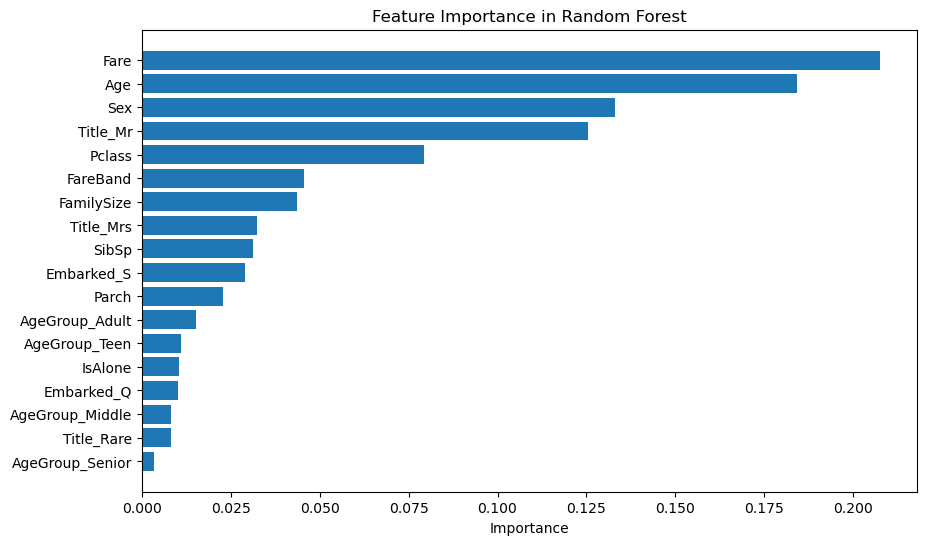

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()